In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drinks = pd.read_csv('./data/drinks.csv')
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [41]:
# 나머지 피처의 수치적 정보를 살펴보기 위해
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [42]:
# 맥주와 와인 소비량의 상광관계 분석 (결과: 맥주 소비량이 많으면 와인 소비량도 많다.)
# pearson은 상관계수를 구하는 계산 방법 중 하나이며, 가장 널리 쓰이는 방법이다.
drinks[['beer_servings','wine_servings']].corr(method = 'pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [43]:
# 맥주는 스피릿보단 와인과 상관관계가 높다.
drinks[['beer_servings','wine_servings']].corr(method = 'pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [44]:
# 여러 피처간의 상관관계 분석하기
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr.values)

[[1.         0.45881887 0.52717169 0.83583863]
 [0.45881887 1.         0.19479705 0.65496818]
 [0.52717169 0.19479705 1.         0.66759834]
 [0.83583863 0.65496818 0.66759834 1.        ]]


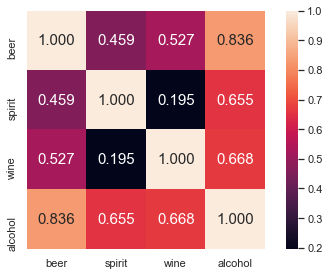

In [45]:
# heatmap 그래프

import seaborn as sns

cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.3f',
                annot_kws = {'size': 15},
                yticklabels = cols_view,
                xticklabels = cols_view)
plt.tight_layout()
plt.show()

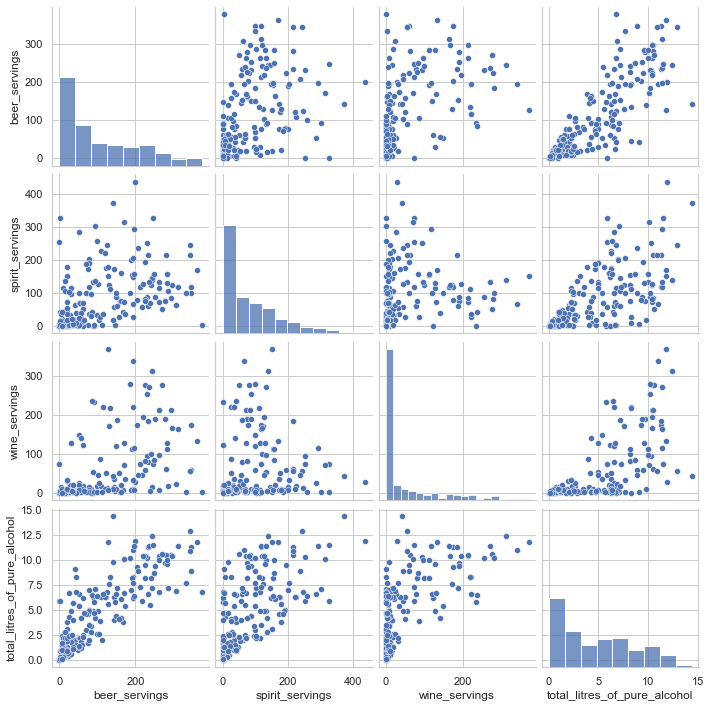

In [46]:
# pairplot 그래프
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings',
                    'wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

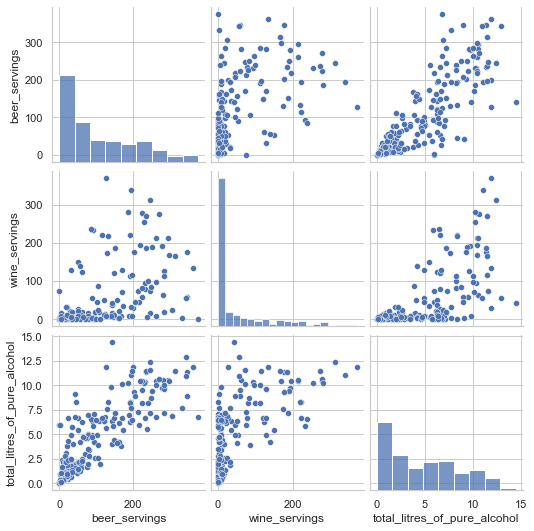

In [47]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(drinks[['beer_servings','wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

In [48]:
# 결측 데이터를 처리한다. 대륙정보가 없는 경우 'OT'로 통합
drinks['continent'] = drinks['continent'].fillna('OT')
drinks['continent'][:10]

0    AS
1    EU
2    AF
3    EU
4    AF
5    OT
6    SA
7    EU
8    OC
9    EU
Name: continent, dtype: object

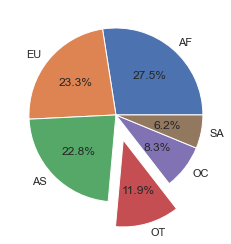

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [49]:
# 파이 차트로 시각화
label = drinks['continent'].value_counts().index.tolist()
fracs = drinks['continent'].value_counts().values.tolist()

explode = (0,0,0,0.3,0,0)

plt.pie(fracs, labels = label, explode = explode, autopct = '%.1f%%', shadow = False)
plt.show()

label
# plt.pie

In [50]:
drinks.groupby('continent')['spirit_servings']

In [51]:
# 두 줄 다 같은 결과 
print(drinks.groupby('continent')['spirit_servings'].mean())
drinks.groupby('continent').spirit_servings.mean()

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64


continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [52]:
# agg 함수를 이용하여 대륙별로 분석

drinks.groupby('continent')['spirit_servings'].agg(['mean', 'max','min','sum'])

,mean,max,min,sum
continent,,,,
AF,16.339623,152,0,866
AS,60.840909,326,0,2677
EU,132.555556,373,0,5965
OC,58.437500,254,0,935
OT,165.739130,438,68,3812
SA,114.750000,302,25,1377


In [53]:
result = drinks.groupby('continent')['spirit_servings'].agg(['mean', 'max','min','sum'])

In [54]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print(drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean())
drinks.groupby('continent')['total_litres_of_pure_alcohol'].agg(['mean', 'max','min','sum'])

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


,mean,max,min,sum
continent,,,,
AF,3.007547,9.1,0.0,159.4
AS,2.170455,11.5,0.0,95.5
EU,8.617778,14.4,0.0,387.8
OC,3.381250,10.4,0.0,54.1
OT,5.995652,11.9,2.2,137.9
SA,6.308333,8.3,3.8,75.7


In [55]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_total_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_total_mean)
total_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


4.717098445595855

In [56]:
# 평균 맥주 소비량이 가장 많은 대륙
beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax()
beer_continent

'EU'

([<matplotlib.axis.XTick at 0x7fa618155b80>,
 [Text(0, 0, 'AF'),
  Text(1, 0, 'AS'),
  Text(2, 0, 'EU'),
  Text(3, 0, 'OC'),
  Text(4, 0, 'OT'),
  Text(5, 0, 'SA')])

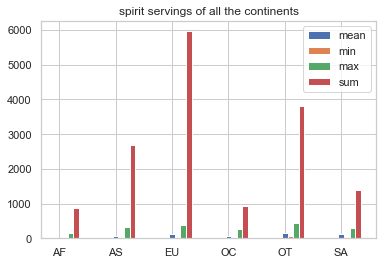

In [57]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화한다.
n_continent = len(result.index)
continent= result.index.tolist()
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_continent)
bar_width = 0.1

plt.bar(index, means, bar_width,label = 'mean')
plt.bar(index + bar_width, mins,bar_width, label = 'min')
plt.bar(index + bar_width * 2, maxs,bar_width, label = 'max')
plt.bar(index + bar_width * 3, sums,bar_width, label = 'sum')

plt.legend()
plt.title('spirit servings of all the continents')
plt.xticks(index, continent)

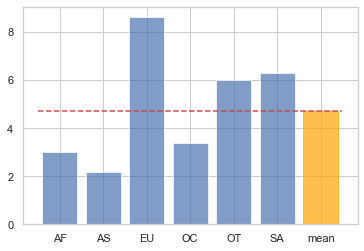

In [58]:
continents = continent_mean.index.tolist()
continents.append('mean')
index = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bars = plt.bar(index, alcohol, alpha = 0.7)
bars[len(continents) - 1].set_color('orange')
plt.plot([0-0.5,6.5], [total_mean, total_mean],'r--')
plt.xticks(index, continents)
plt.show()

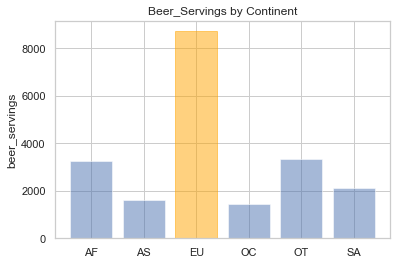

In [59]:
# 대륙별 맥주 소비량 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index('EU')].set_color('orange')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('Beer_Servings by Continent')

plt.show()

In [60]:
# 대한민국은 얼마나 술을 독하게 마시는 나라일까?

# total_servings 피처를 생성한다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처를 생성한다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending = 0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
